En este código se grafican las curvas teóricas de Bit Error Rate (BER) y Symbol Error Rate (SER) para todas las modulaciones del tipo M-PSK,
a cualquier valor de potencia máxima transmitida. Comparando con la función 'bertool' de MATLAB, se obtienen las mismas curvas de BER.

In [ ]:
import numpy as np # for algebra, arrays, etc
import cmath # for polar numbers 
import scipy.integrate as integrate 
import matplotlib.pyplot as plt # for plotting functions

global PI
PI = np.pi

def binary_to_gray(n):
   #Convert Binary to Gray codeword and return it. Reference: https://www.sanfoundry.com/python-program-convert-binary-gray-code/
    n = int(n, 2) # a binary number (second arg expresses base 2) is converted to int
    n ^= (n >> 1)
    return bin(n)[2:] 

def fun_asymp(order = 2, data = True, max_dB = 12, show_fig = True):
  # Ber and Ser asymptotes for M-PSK. By Adrian Ramirez
  # Relation between EsN0 and EbN0. Ref: https://www.mathworks.com/help/comm/ug/awgn-channel.html
  # To compare with Matlab bertool curves. Ref: https://www.mathworks.com/help/comm/ref/berawgn.html
  # SER for M-PSK: https://nl.mathworks.com/help/comm/ug/analytical-expressions-used-in-berawgn-function-and-bit-error-rate-analysis-app.html#responsive_offcanvas
  # Integration: #https://docs.scipy.org/doc/scipy/tutorial/integrate.html, https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html#scipy.integrate.quad
  
  M = order # modulation order
  k = np.log2(M) # bits per symbols

  vct_dB = np.arange(max_dB)
  vct_ber_asymp = np.zeros(max_dB)
  vct_ser_asymp = np.zeros(max_dB)

  if show_fig == True:
    plt.figure(figsize=(14, 6.5), dpi= 80, facecolor='w', edgecolor='k')
    ax3 = plt.subplot(1,2,1)
    ax4 = plt.subplot(1,2,2)

  vct_hamming = np.zeros(M)
  for constellation_point in np.arange(0, M):
    point_bin = np.binary_repr(constellation_point, width=4)
    point_gray = binary_to_gray(point_bin)
    vct_hamming[constellation_point] = point_gray.count('1')

  for value_dB in vct_dB:
    value_x = 10**(value_dB/10)

    # BER for M-PSK

    P_b = 0
    for i in range(1, M//2+1):
      if i == M//2:
        w = vct_hamming[i]
      else:
        w = vct_hamming[i] + vct_hamming[M-i]
      integ_1 = integrate.quad(lambda theta: np.exp(-k*value_x*((np.sin((2*i-1)*PI/M))**2)/((np.sin(theta))**2) ), 0, PI*(1-(2*i-1)/M))
      integ_2 = integrate.quad(lambda theta: np.exp(-k*value_x*((np.sin((2*i+1)*PI/M))**2)/((np.sin(theta))**2) ), 0, PI*(1-(2*i+1)/M))
      P_i = (1/(2*PI))*(integ_1[0] - integ_2[0])
      P_b += (1/k)*w*P_i

    vct_ber_asymp[value_dB] = P_b

    # SER for M-PSK

    integration = integrate.quad(lambda theta: np.exp(-value_x*((np.sin(PI/M))**2)/((np.sin(theta))**2) ), 0, (M-1)*PI/M) # Considering EsNo = k*EbNo
    vct_ser_asymp[value_dB] = (1/PI)*integration[0]
    #print('integrate.quad error: ', integration[1])
    
    if show_fig == True and data == True:
        ax3.annotate('({}, {})'.format(value_dB, round(vct_ber_asymp[value_dB], 8)),(value_dB, vct_ber_asymp[value_dB]))   # annotate method puts data points in the graphic
        ax4.annotate('({}, {})'.format(value_dB, round(vct_ser_asymp[value_dB], 8)),(value_dB, vct_ser_asymp[value_dB]))   

  if show_fig == True:
    ax3.set_title('BER vs EbN0 in dB');
    ax3.semilogy(vct_dB, vct_ber_asymp, 'b.-')
    ax3.grid(True)
    ax4.set_title('SER vs EsN0 in dB');
    ax4.semilogy(vct_dB, vct_ser_asymp, 'b.-')
    ax4.grid(True)
  
  return (vct_ber_asymp, vct_ser_asymp)

BPSK

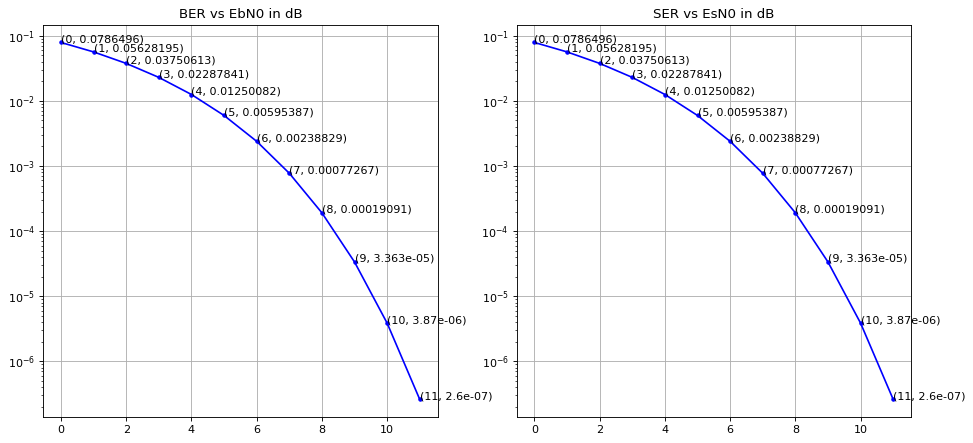

In [ ]:
fun_asymp(order = 2, data = True, max_dB = 12, show_fig = True);

QPSK

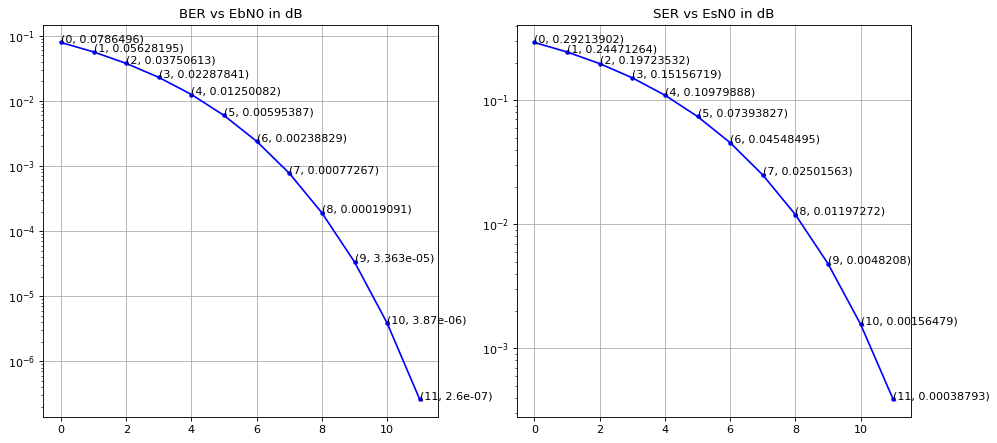

In [ ]:
fun_asymp(order = 4, data = True, max_dB = 12, show_fig = True);

8-PSK

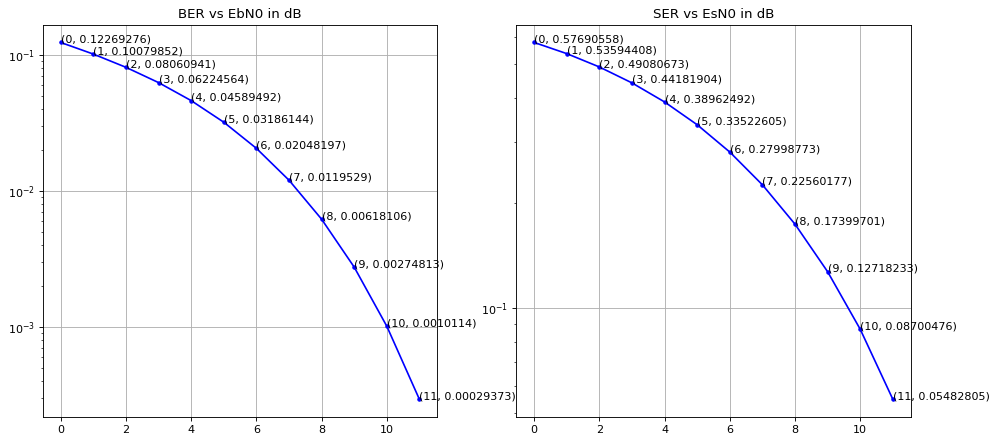

In [ ]:
fun_asymp(order = 8, data = True, max_dB = 12, show_fig = True);

16-PSK

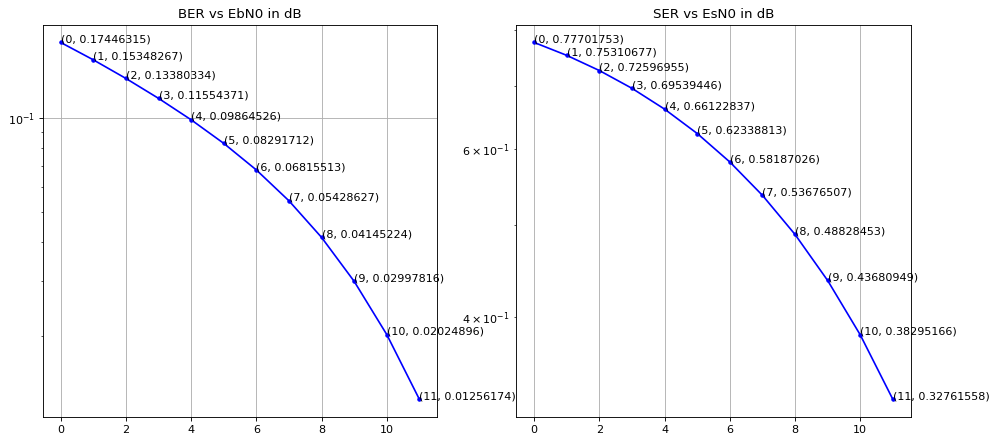

In [ ]:
fun_asymp(order = 16, data = True, max_dB = 12, show_fig = True);

32-PSK

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: DeprecationWarning: Insufficient bit width provided. This behavior will raise an error in the future.


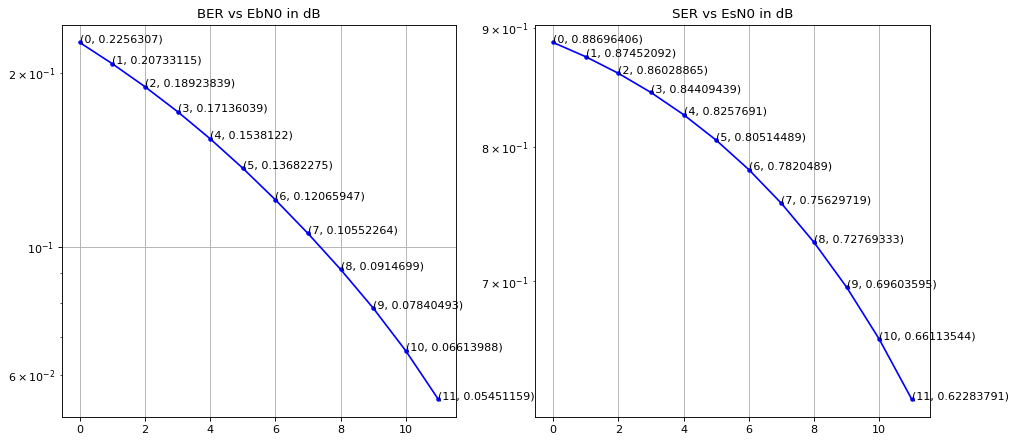

In [ ]:
fun_asymp(order = 32, data = True, max_dB = 12, show_fig = True);

64-PSK

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: DeprecationWarning: Insufficient bit width provided. This behavior will raise an error in the future.


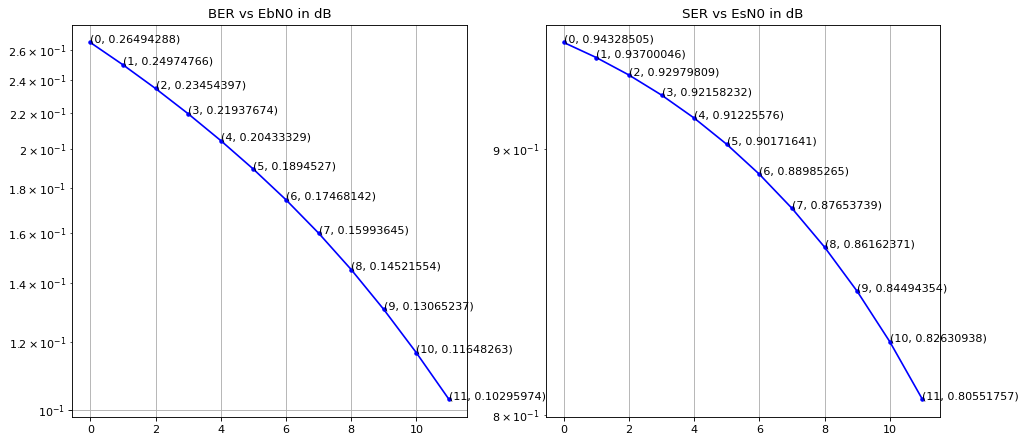

In [ ]:
fun_asymp(order = 64, data = True, max_dB = 12, show_fig = True);

128-PSK

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: DeprecationWarning: Insufficient bit width provided. This behavior will raise an error in the future.


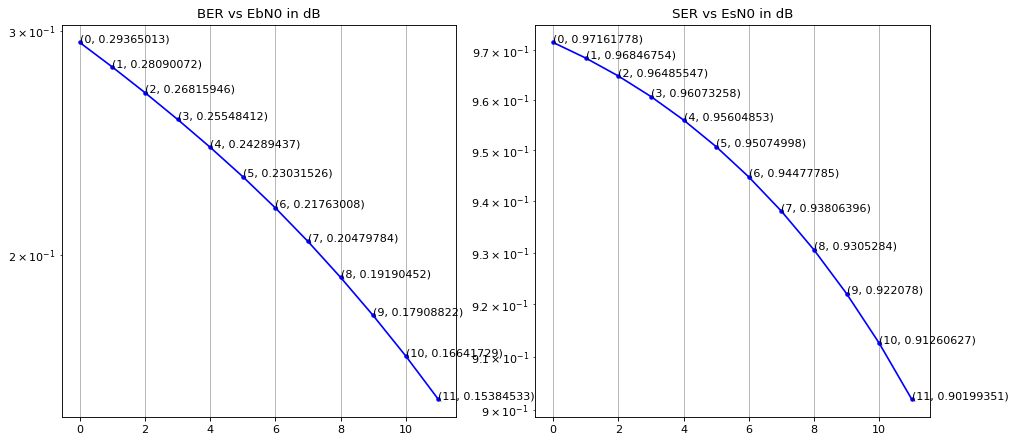

In [ ]:
fun_asymp(order = 128, data = True, max_dB = 12, show_fig = True);

256-PSK

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: DeprecationWarning: Insufficient bit width provided. This behavior will raise an error in the future.


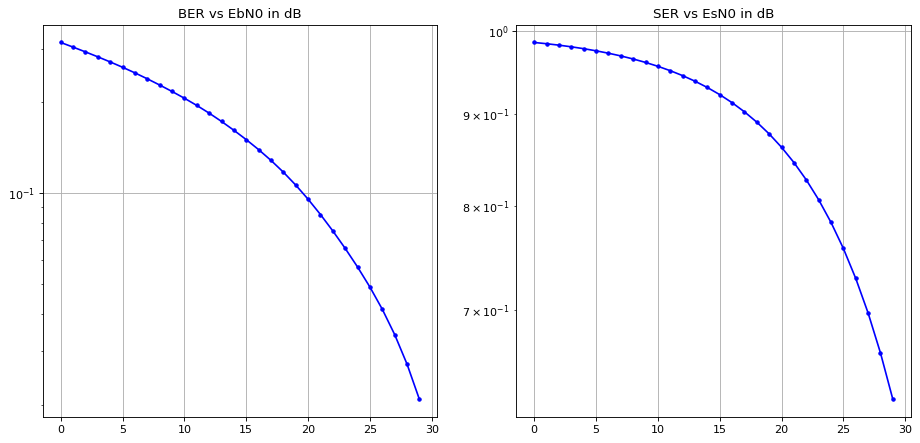

In [ ]:
fun_asymp(order = 256, data = False, max_dB = 30, show_fig = True);

[![CC BY 4.0][cc-by-shield]][cc-by]

This work is licensed under a
[Creative Commons Attribution 4.0 International License][cc-by].

[![CC BY 4.0][cc-by-image]][cc-by]

[cc-by]: http://creativecommons.org/licenses/by/4.0/
[cc-by-image]: https://i.creativecommons.org/l/by/4.0/88x31.png
[cc-by-shield]: https://img.shields.io/badge/License-CC%20BY%204.0-lightgrey.svg

![logo_neon_erasmus](https://raw.githubusercontent.com/neon-iot/communication_labs/main/detection_theory/notebooks/images/BannerSupportErasmus_.png)
